# Исследовательский проект по НИС «Анализ данных в Python»

## 1 часть: исследование датасета «Highest Holywood Grossing Movies»

Датасет: https://www.kaggle.com/sanjeetsinghnaik/top-1000-highest-grossing-movies

Предварительная работа - отключаем предупреждения в ноутбуке для большей читаемости, импортируем необходимые библиотеки и считываем сам набор данных из скачанного файла формата .csv, устанавливаем первый столбец колонкой индексов.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 7)})

In [5]:
from scipy.stats import norm

In [6]:
data = pd.read_csv("Highest Holywood Grossing Movies.csv", index_col=0)
data

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
...,...,...,...,...,...,...,...,...,...,...
913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13
914,Jimmy Neutron: Boy Genius (2001),An eight-year-old boy genius and his friends m...,Paramount Pictures,"December 21, 2001",80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,NaN
915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R


Так как в датасете будет много столбцов, включаем отображение всех колонок (то есть убираем многоточие). Устанавливаем не-научный формат для чисел.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       918 non-null    object
 1   Movie Info                  918 non-null    object
 2   Distributor                 918 non-null    object
 3   Release Date                800 non-null    object
 4   Domestic Sales (in $)       918 non-null    int64 
 5   International Sales (in $)  918 non-null    int64 
 6   World Sales (in $)          918 non-null    int64 
 7   Genre                       918 non-null    object
 8   Movie Runtime               918 non-null    object
 9   License                     744 non-null    object
dtypes: int64(3), object(7)
memory usage: 78.9+ KB


In [8]:
pd.set_option('display.max_columns', None)

In [9]:
pd.options.display.float_format = '{}'.format

### Информация о датасете

Из источника:

"""

Context

This dataset contains information about the top 1000 highest grossing holywood films. It is up to date as of 10th January 2022.

Acknowledgements

This data has been scraped from multiple site and has been added together for performing various datat operations. The data has been taken from idmb, rotten tomatoes and many other sites.

"""

Столбцы и типы переменных:

Title – название фильма

Movie Info – краткое описание сюжета

Distributor – компания-дистрибьютор (категориальная)

Release date – дата выхода (интервальная)

Domestic Sales (in $) – сборы на внутреннем рынке (интервальная)

International Sales (in $) – сборы на внешнем рынке (интервальная)

World Sales (in $) - суммарные сборы (интервальная)

Genre – жанры в котором снят фильм (категориальная)

Movie Runtime – продолжительность фильма (интервальная)

License – возрастное ограничение (категориальная)


### Приведение набора данных к удобному для анализа виду

#### 1. Изменение названий столбцов.

Заменим пробелы (" ") в названиях столбцов на символы нижнего подчеркивания ("_") для возможности обращения к колонкам не только как df["column_name"], но и как df.column_name. Уберем скобки и заменим знак доллара ("$") на "USD".

In [10]:
# до
data.columns

Index(['Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License'],
      dtype='object')

In [11]:
# после
data.columns = ["_".join(col.split()).replace('$', 'USD').replace('(', '').replace(')', '') for col in data.columns]
data.columns

Index(['Title', 'Movie_Info', 'Distributor', 'Release_Date',
       'Domestic_Sales_in_USD', 'International_Sales_in_USD',
       'World_Sales_in_USD', 'Genre', 'Movie_Runtime', 'License'],
      dtype='object')

#### 2. Удаление столбцов.

Избавимся от столбца Movie_Info, который не используется в нашем исследовании.

In [12]:
data = data.drop(["Movie_Info"], 1)
data

,Title,Distributor,Release_Date,Domestic_Sales_in_USD,International_Sales_in_USD,World_Sales_in_USD,Genre,Movie_Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
...,...,...,...,...,...,...,...,...,...
913,The Notebook (2004),New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13
914,Jimmy Neutron: Boy Genius (2001),Paramount Pictures,"December 21, 2001",80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,NaN
915,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,The Texas Chainsaw Massacre (2003),New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R


#### 3. Создание столбцов на основе существующих и изменение типов колонок.

Работа с колонкой Genre.

Работа с списком неудобна, поэтому создадим для каждого жанра отдельный столбец, который будет содержать 0, если фильм не относится к нему, и 1 в противном случае. Исходный столбец удалим, так как в исследовании участвовать он не будет.

В данный момент элементы столбца - строки, преобразуем их в списки, одновременно собирая и список всех жанров. При преобразовании также заменим Sci-Fi на SciFi.

In [13]:
all_genres = set()
for i in range(len(data.Genre)):
    genres = data.Genre[i].split(', ')
    data.Genre[i] = []
    for el in genres:
        new_el = el.replace("'", '').replace('[', '').replace(']', '').replace('-', '')
        all_genres.add(new_el)
        data.Genre[i] += [new_el]
all_genres = sorted(list(all_genres))
print('Все жанры:', ', '.join(all_genres))

Все жанры: Action, Adventure, Animation, Biography, Comedy, Crime, Documentary, Drama, Family, Fantasy, History, Horror, Music, Musical, Mystery, Romance, SciFi, Sport, Thriller, War, Western


Теперь заполним столбцы по жанрам булевыми значениями (True/False)

In [14]:
for genre in all_genres:
    data[genre] = data.Genre.apply(lambda x: genre in x)   
data

,Title,Distributor,Release_Date,Domestic_Sales_in_USD,International_Sales_in_USD,World_Sales_in_USD,Genre,Movie_Runtime,License,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"[Action, Adventure, SciFi]",2 hr 18 min,PG-13,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"[Action, Adventure, Drama, SciFi]",3 hr 1 min,PG-13,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
2,Avatar (2009),Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"[Action, Adventure, Fantasy, SciFi]",2 hr 42 min,PG-13,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
3,Black Panther (2018),Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"[Action, Adventure, SciFi]",2 hr 14 min,NaN,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"[Action, Adventure, SciFi]",2 hr 29 min,NaN,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,The Notebook (2004),New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"[Drama, Romance]",2 hr 3 min,PG-13,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
914,Jimmy Neutron: Boy Genius (2001),Paramount Pictures,"December 21, 2001",80936232,22056304,102992536,"[Action, Adventure, Animation, Comedy, Family,...",1 hr 22 min,NaN,True,True,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
915,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"[Biography, Drama, Romance]",2 hr 13 min,PG-13,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
916,The Texas Chainsaw Massacre (2003),New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"[Crime, Horror]",1 hr 38 min,R,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


Наконец, заменим True/False на 1/0 (то есть из bool в int).

In [15]:
data[all_genres] = data[all_genres].astype(int)
data

,Title,Distributor,Release_Date,Domestic_Sales_in_USD,International_Sales_in_USD,World_Sales_in_USD,Genre,Movie_Runtime,License,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"[Action, Adventure, SciFi]",2 hr 18 min,PG-13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"[Action, Adventure, Drama, SciFi]",3 hr 1 min,PG-13,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Avatar (2009),Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"[Action, Adventure, Fantasy, SciFi]",2 hr 42 min,PG-13,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,Black Panther (2018),Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"[Action, Adventure, SciFi]",2 hr 14 min,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"[Action, Adventure, SciFi]",2 hr 29 min,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,The Notebook (2004),New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"[Drama, Romance]",2 hr 3 min,PG-13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
914,Jimmy Neutron: Boy Genius (2001),Paramount Pictures,"December 21, 2001",80936232,22056304,102992536,"[Action, Adventure, Animation, Comedy, Family,...",1 hr 22 min,NaN,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
915,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"[Biography, Drama, Romance]",2 hr 13 min,PG-13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
916,The Texas Chainsaw Massacre (2003),New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"[Crime, Horror]",1 hr 38 min,R,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Теперь можно удалить стобец Genre.

In [16]:
data = data.drop("Genre", 1)
data

,Title,Distributor,Release_Date,Domestic_Sales_in_USD,International_Sales_in_USD,World_Sales_in_USD,Movie_Runtime,License,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,2 hr 18 min,PG-13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,3 hr 1 min,PG-13,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Avatar (2009),Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,2 hr 42 min,PG-13,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,Black Panther (2018),Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,2 hr 14 min,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,2 hr 29 min,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,The Notebook (2004),New Line Cinema,"June 25, 2004",81001787,36813370,117815157,2 hr 3 min,PG-13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
914,Jimmy Neutron: Boy Genius (2001),Paramount Pictures,"December 21, 2001",80936232,22056304,102992536,1 hr 22 min,NaN,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
915,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,2 hr 13 min,PG-13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
916,The Texas Chainsaw Massacre (2003),New Line Cinema,"October 17, 2003",80571655,26792250,107363905,1 hr 38 min,R,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


#### 4. Работа с NaN-значениями.

Проверим, в каких столбцах они встречаются.

In [17]:
data.isna().any()

Title                         False
Distributor                   False
Release_Date                   True
Domestic_Sales_in_USD         False
International_Sales_in_USD    False
World_Sales_in_USD            False
Movie_Runtime                 False
License                        True
Action                        False
Adventure                     False
Animation                     False
Biography                     False
Comedy                        False
Crime                         False
Documentary                   False
Drama                         False
Family                        False
Fantasy                       False
History                       False
Horror                        False
Music                         False
Musical                       False
Mystery                       False
Romance                       False
SciFi                         False
Sport                         False
Thriller                      False
War                         

In [18]:
data.Release_Date.isna()

0      False
1      False
2      False
3       True
4       True
       ...  
913    False
914    False
915    False
916    False
917    False
Name: Release_Date, Length: 918, dtype: bool

Итак, пустые значения есть в колонке дат и в колонке возрастных лицензий. По информации с www.kaggle.com, например, в столбце дат 13% NaN'ов, так что вручную мы их не заполним, а автоматическое заполнение не гарантирует качества. Потому создадим новый датасет из строк без NaNов.

In [19]:
old_data = data
data = data[data.Release_Date.notna()][data.License.notna()]
data

,Title,Distributor,Release_Date,Domestic_Sales_in_USD,International_Sales_in_USD,World_Sales_in_USD,Movie_Runtime,License,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,2 hr 18 min,PG-13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,3 hr 1 min,PG-13,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Avatar (2009),Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,2 hr 42 min,PG-13,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
6,Titanic (1997),Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,3 hr 14 min,PG-13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
7,Jurassic World (2015),Universal Pictures,"June 10, 2015",652385625,1018130819,1670516444,2 hr 4 min,PG-13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,While You Were Sleeping (1995),Walt Disney Studios Motion Pictures,"April 21, 1995",81057016,101000000,182057016,1 hr 43 min,PG,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
913,The Notebook (2004),New Line Cinema,"June 25, 2004",81001787,36813370,117815157,2 hr 3 min,PG-13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
915,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,2 hr 13 min,PG-13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
916,The Texas Chainsaw Massacre (2003),New Line Cinema,"October 17, 2003",80571655,26792250,107363905,1 hr 38 min,R,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 917
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       744 non-null    object
 1   Distributor                 744 non-null    object
 2   Release_Date                744 non-null    object
 3   Domestic_Sales_in_USD       744 non-null    int64 
 4   International_Sales_in_USD  744 non-null    int64 
 5   World_Sales_in_USD          744 non-null    int64 
 6   Movie_Runtime               744 non-null    object
 7   License                     744 non-null    object
 8   Action                      744 non-null    int32 
 9   Adventure                   744 non-null    int32 
 10  Animation                   744 non-null    int32 
 11  Biography                   744 non-null    int32 
 12  Comedy                      744 non-null    int32 
 13  Crime                       744 non-null    int32 

Переиндексируем столбцы:

In [21]:
data.index = range(0, 744)

In [22]:
data

,Title,Distributor,Release_Date,Domestic_Sales_in_USD,International_Sales_in_USD,World_Sales_in_USD,Movie_Runtime,License,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,2 hr 18 min,PG-13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,3 hr 1 min,PG-13,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Avatar (2009),Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,2 hr 42 min,PG-13,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,Titanic (1997),Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,3 hr 14 min,PG-13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Jurassic World (2015),Universal Pictures,"June 10, 2015",652385625,1018130819,1670516444,2 hr 4 min,PG-13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,While You Were Sleeping (1995),Walt Disney Studios Motion Pictures,"April 21, 1995",81057016,101000000,182057016,1 hr 43 min,PG,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
740,The Notebook (2004),New Line Cinema,"June 25, 2004",81001787,36813370,117815157,2 hr 3 min,PG-13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
741,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,2 hr 13 min,PG-13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
742,The Texas Chainsaw Massacre (2003),New Line Cinema,"October 17, 2003",80571655,26792250,107363905,1 hr 38 min,R,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Убедимся, что все заполнено.

In [23]:
data.isna().any()

Title                         False
Distributor                   False
Release_Date                  False
Domestic_Sales_in_USD         False
International_Sales_in_USD    False
World_Sales_in_USD            False
Movie_Runtime                 False
License                       False
Action                        False
Adventure                     False
Animation                     False
Biography                     False
Comedy                        False
Crime                         False
Documentary                   False
Drama                         False
Family                        False
Fantasy                       False
History                       False
Horror                        False
Music                         False
Musical                       False
Mystery                       False
Romance                       False
SciFi                         False
Sport                         False
Thriller                      False
War                         

Поменяем тип колонки Release_Date на datetime.

In [24]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data

,Title,Distributor,Release_Date,Domestic_Sales_in_USD,International_Sales_in_USD,World_Sales_in_USD,Movie_Runtime,License,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,2 hr 18 min,PG-13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,3 hr 1 min,PG-13,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Avatar (2009),Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,2 hr 42 min,PG-13,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,Titanic (1997),Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,3 hr 14 min,PG-13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Jurassic World (2015),Universal Pictures,2015-06-10,652385625,1018130819,1670516444,2 hr 4 min,PG-13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,While You Were Sleeping (1995),Walt Disney Studios Motion Pictures,1995-04-21,81057016,101000000,182057016,1 hr 43 min,PG,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
740,The Notebook (2004),New Line Cinema,2004-06-25,81001787,36813370,117815157,2 hr 3 min,PG-13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
741,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),2010-08-13,80574010,124020006,204594016,2 hr 13 min,PG-13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
742,The Texas Chainsaw Massacre (2003),New Line Cinema,2003-10-17,80571655,26792250,107363905,1 hr 38 min,R,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Так как теперь у нас есть все возрастные лицензии, создадим новый столбец, в котором укажем минимальный рекомендуемый возраст для просмотра фильма (на основе этого, например, мы сможем посчитать корреляции).

In [25]:
data.License.unique()

array(['PG-13', 'PG', 'G', 'R'], dtype=object)

Вставим новый столбец рядом с столбцом возрастных лицензий.

In [26]:
data.insert(8, "Min_Age", data.License.apply(lambda x: {'G': 0, 'PG': 9, 'PG-13': 13, 'R': 16}[x]))
data

,Title,Distributor,Release_Date,Domestic_Sales_in_USD,International_Sales_in_USD,World_Sales_in_USD,Movie_Runtime,License,Min_Age,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,2 hr 18 min,PG-13,13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,3 hr 1 min,PG-13,13,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Avatar (2009),Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,2 hr 42 min,PG-13,13,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,Titanic (1997),Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,3 hr 14 min,PG-13,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Jurassic World (2015),Universal Pictures,2015-06-10,652385625,1018130819,1670516444,2 hr 4 min,PG-13,13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,While You Were Sleeping (1995),Walt Disney Studios Motion Pictures,1995-04-21,81057016,101000000,182057016,1 hr 43 min,PG,9,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
740,The Notebook (2004),New Line Cinema,2004-06-25,81001787,36813370,117815157,2 hr 3 min,PG-13,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
741,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),2010-08-13,80574010,124020006,204594016,2 hr 13 min,PG-13,13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
742,The Texas Chainsaw Massacre (2003),New Line Cinema,2003-10-17,80571655,26792250,107363905,1 hr 38 min,R,16,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Также преобразуем Movie_Runtime к int, заполнив колонку длиной фильмов в минутах.

In [27]:
data.Movie_Runtime = data.Movie_Runtime.apply(lambda x: (int(x.split()[0]) * 60 + int(x.split()[2])) if len(x.split()) == 4
                                              else int(x.split()[0]) * 60 if x.split()[1] == 'hr' else int(x.split()[0])) 
data

,Title,Distributor,Release_Date,Domestic_Sales_in_USD,International_Sales_in_USD,World_Sales_in_USD,Movie_Runtime,License,Min_Age,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,138,PG-13,13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,181,PG-13,13,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Avatar (2009),Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,162,PG-13,13,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,Titanic (1997),Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,194,PG-13,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Jurassic World (2015),Universal Pictures,2015-06-10,652385625,1018130819,1670516444,124,PG-13,13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,While You Were Sleeping (1995),Walt Disney Studios Motion Pictures,1995-04-21,81057016,101000000,182057016,103,PG,9,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
740,The Notebook (2004),New Line Cinema,2004-06-25,81001787,36813370,117815157,123,PG-13,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
741,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),2010-08-13,80574010,124020006,204594016,133,PG-13,13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
742,The Texas Chainsaw Massacre (2003),New Line Cinema,2003-10-17,80571655,26792250,107363905,98,R,16,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


#### 5. Преобразование интервальных переменных к категориальным.

Работать будем с столбцами продаж и столбцом длительности фильмов.

Добавим новый столбец Category_Of_Sum_Sales_Of_Film, показывающий, являются ли суммарные сборы фильма высокими, средними или низкими. Medium, если разница суммарных сборов фильма и медианной величины данного показателя не больше 25%, в другом случае, если суммарные продажи больше, то High, иначе Low.

In [28]:
sum_median = data.World_Sales_in_USD.median()
# рассчитаем суммарные сборы фильма по всем показателям
data["Category_Sum_Sales"] = data.World_Sales_in_USD.apply(lambda x: "Medium" if abs(sum_median - x) / sum_median <= 0.25 else "Low" if x < sum_median else "High")
data

,Title,Distributor,Release_Date,Domestic_Sales_in_USD,International_Sales_in_USD,World_Sales_in_USD,Movie_Runtime,License,Min_Age,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western,Category_Sum_Sales
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,138,PG-13,13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,High
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,181,PG-13,13,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,High
2,Avatar (2009),Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,162,PG-13,13,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,High
3,Titanic (1997),Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,194,PG-13,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,High
4,Jurassic World (2015),Universal Pictures,2015-06-10,652385625,1018130819,1670516444,124,PG-13,13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,While You Were Sleeping (1995),Walt Disney Studios Motion Pictures,1995-04-21,81057016,101000000,182057016,103,PG,9,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,Low
740,The Notebook (2004),New Line Cinema,2004-06-25,81001787,36813370,117815157,123,PG-13,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,Low
741,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),2010-08-13,80574010,124020006,204594016,133,PG-13,13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,Low
742,The Texas Chainsaw Massacre (2003),New Line Cinema,2003-10-17,80571655,26792250,107363905,98,R,16,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Low


Добавим новый столбец Category_Duration, характеризующий длительность фильма.
Medium, если разница между длительностью фильма и медианным значением <= 15 минут, в другом случае, если длительность фильма больше, то Long, иначе Short.

In [29]:
time_mean = data.Movie_Runtime.median()
data["Category_Duration"] = data.Movie_Runtime.apply(lambda x: "Medium" if abs(x - time_mean) <= 15 else "Short" if x < time_mean else "Long")
data

,Title,Distributor,Release_Date,Domestic_Sales_in_USD,International_Sales_in_USD,World_Sales_in_USD,Movie_Runtime,License,Min_Age,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western,Category_Sum_Sales,Category_Duration
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,138,PG-13,13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,High,Long
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,181,PG-13,13,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,High,Long
2,Avatar (2009),Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,162,PG-13,13,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,High,Long
3,Titanic (1997),Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,194,PG-13,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,High,Long
4,Jurassic World (2015),Universal Pictures,2015-06-10,652385625,1018130819,1670516444,124,PG-13,13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,While You Were Sleeping (1995),Walt Disney Studios Motion Pictures,1995-04-21,81057016,101000000,182057016,103,PG,9,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,Low,Medium
740,The Notebook (2004),New Line Cinema,2004-06-25,81001787,36813370,117815157,123,PG-13,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,Low,Medium
741,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),2010-08-13,80574010,124020006,204594016,133,PG-13,13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,Low,Long
742,The Texas Chainsaw Massacre (2003),New Line Cinema,2003-10-17,80571655,26792250,107363905,98,R,16,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Low,Short


#### 6. Формирование среза по таблице и его транспонирование.

Отсортируем датасет по суммарным сборам (по убыванию) и отберем первые 25% строк, после чего транспонируем полученную таблицу.

In [30]:
date = data.sort_values(by="World_Sales_in_USD", ascending=False)
sliced = date.head(int(0.25 * 918))
sliced.transpose()

,2,1,3,0,4,7,5,46,12,15,6,24,33,11,136,26,52,27,37,34,20,47,76,113,16,53,10,19,22,23,9,45,117,99,31,13,55,66,8,41,42,30,72,49,84,77,17,147,68,89,51,184,179,54,100,271,40,58,36,21,35,44,155,69,83,32,85,29,25,74,124,62,63,111,236,18,138,256,67,38,119,61,43,14,56,144,116,101,50,118,148,60,125,86,91,81,95,103,92,79,163,64,59,197,78,160,28,186,57,127,80,87,185,258,90,137,277,75,71,167,97,149,130,132,159,218,70,166,222,134,128,253,39,328,426,390,215,123,176,249,110,199,108,65,106,354,88,255,250,333,190,142,305,173,200,141,48,150,286,109,174,171,120,82,206,204,321,175,252,194,177,275,162,93,331,170,213,96,383,372,143,121,264,484,315,98,201,373,191,114,330,146,223,246,73,165,183,289,157,195,94,104,407,129,239,198,219,122,413,212,158,500,205,211,180,298,241,188,133,172,139,307,140,661,233,151,329,301,273
Title,Avatar (2009),Avengers: Endgame (2019),Titanic (1997),Star Wars: Episode VII - The Force Awakens (2015),Jurassic World (2015),The Lion King (2019),The Avengers (2012),Furious 7 (2015),Frozen II (2019),Avengers: Age of Ultron (2015),Star Wars: Episode VIII - The Last Jedi (2017),Jurassic World: Fallen Kingdom (2018),Frozen (2013),Beauty and the Beast (2017),The Fate of the Furious (2017),Iron Man 3 (2013),Minions (2015),Captain America: Civil War (2016),The Lord of the Rings: The Return of the King ...,Spider-Man: Far from Home (2019),Captain Marvel (2019),Transformers: Dark of the Moon (2011),Skyfall (2012),Transformers: Age of Extinction (2014),The Dark Knight Rises (2012),Joker (2019),Star Wars: Episode IX - The Rise of Skywalker ...,Toy Story 4 (2019),Pirates of the Caribbean: Dead Man's Chest (2006),The Lion King (1994),Rogue One: A Star Wars Story (2016),Aladdin (2019),Pirates of the Caribbean: On Stranger Tides (2...,Despicable Me 3 (2017),Jurassic Park (1993),Star Wars: Episode I - The Phantom Menace (1999),Alice in Wonderland (2010),Harry Potter and the Sorcerer's Stone (2001),The Dark Knight (2008),Despicable Me 2 (2013),The Jungle Book (2016),Jumanji: Welcome to the Jungle (2017),Pirates of the Caribbean: At World's End (2007),The Lord of the Rings: The Two Towers (2002),Harry Potter and the Order of the Phoenix (2007),Harry Potter and the Half-Blood Prince (2009),Shrek 2 (2004),Bohemian Rhapsody (2018),The Lord of the Rings: The Fellowship of the R...,Harry Potter and the Goblet of Fire (2005),Spider-Man 3 (2007),Ice Age: Dawn of the Dinosaurs (2009),Spectre (2015),Spider-Man: Homecoming (2017),Harry Potter and the Chamber of Secrets (2002),Ice Age: Continental Drift (2012),The Secret Life of Pets (2016),Batman v Superman: Dawn of Justice (2016),Star Wars: Episode III - Revenge of the Sith (...,The Hunger Games: Catching Fire (2013),Guardians of the Galaxy Vol. 2 (2017),Inside Out (2015),Venom (2018),Thor: Ragnarok (2017),Inception (2010),Transformers: Revenge of the Fallen (2009),The Twilight Saga: Breaking Dawn - Part 2 (2012),Spider-Man (2002),Wonder Woman (2017),Independence Day (1996),Fantastic Beasts and Where to Find Them (2016),Shrek the Third (2007),Jumanji: The Next Level (2019),Harry Potter and the Prisoner of Azkaban (2004),Pirates of the Caribbean: Dead Men Tell No Tal...,E.T. the Extra-Terrestrial (1982),Mission: Impossible - Fallout (2018),2012 (2009),Indiana Jones and the Kingdom of the Crystal S...,Spider-Man 2 (2004),Fast & Furious 6 (2013),Deadpool 2 (2018),Deadpool (2016),Star Wars: Episode IV - A New Hope (1977),Guardians of the Galaxy (2014),The Da Vinci Code (2006),Maleficent (2014),The Amazing Spider-Man (2012),The Hunger Games: Mockingjay - Part 1 (2014),Shrek Forever After (2010),Madagascar 3: Europe's Most Wanted (2012),Suicide Squad (2016),X-Men: Days of Future Past (2014),"The Chronicles of Narnia: The Lion, the Witch ...",The Matrix Reloaded (2003),Up (2009),Gravity (2013),Captain America: The Winter Soldier (2014),The Twilight Saga: Breaking Dawn - Part 1 (2011),The Twilight Saga: New Moon (2009),Dawn of the Planet of the Apes (2014),Transformers (2007),It (2017),Interstellar (2014),The T

#### 7. Многоуровневая сортировка.

Отсортируем датасет по столбцам Movie_Runtime, Min_Age, World_Sales_in_USD одновременно и отобразим первые 20 строк.

In [31]:
date = data.sort_values(by=["Movie_Runtime", "Min_Age", "World_Sales_in_USD"])
date[["Movie_Runtime", "Min_Age", "World_Sales_in_USD"]].head(20)

,Movie_Runtime,Min_Age,World_Sales_in_USD
610,78,9,134403112
361,81,0,314432837
596,81,9,203509374
228,81,9,383257136
340,81,16,248639099
578,82,9,133960541
353,82,9,349822765
651,83,9,171757863
652,83,13,178262620
546,83,16,207039844


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Title                       744 non-null    object        
 1   Distributor                 744 non-null    object        
 2   Release_Date                744 non-null    datetime64[ns]
 3   Domestic_Sales_in_USD       744 non-null    int64         
 4   International_Sales_in_USD  744 non-null    int64         
 5   World_Sales_in_USD          744 non-null    int64         
 6   Movie_Runtime               744 non-null    int64         
 7   License                     744 non-null    object        
 8   Min_Age                     744 non-null    int64         
 9   Action                      744 non-null    int32         
 10  Adventure                   744 non-null    int32         
 11  Animation                   744 non-null    int32         

### Проверка гипотез

#### Список гипотез.

1) Компании чаще всего ориентируются на возрастную лицензию PG-13.

2) Чаще всего встречаются фильмы средней продолжительности.

3) Наиболее часто встречаемой студии в таблице принадлежат самые высокие сборы одного фильма хотя бы по одному из показателей сборов.

4) Большая часть фильмов из ТОП-100 по продажам выпущена зимой или летом.

5) Существует корреляция между возрастным ограничением и сборами фильма.

6) Существует корреляция между жанрами и возрастным ограничением.

7) Экшен-фильмы и фильмы в жанре фэнтези - одни из самых кассовых.

8) Более новые фильмы имеют более высокое количество продаж (+ в целом проанализировать продажи по годам).

9) Внешние продажи тесно связаны с внутренними.

10) (Ради которой и проводилось исследование!) Дисней чаще всего снимает анимации.

#### Гипотеза №1:

Построим две столбиковые диаграммы типа bar с и без накопления (stacked), чтобы проанализировать общее количество фильмов и количество фильмов по возрастным лицензиям.

Text(0, 0.5, 'Количество фильмов')

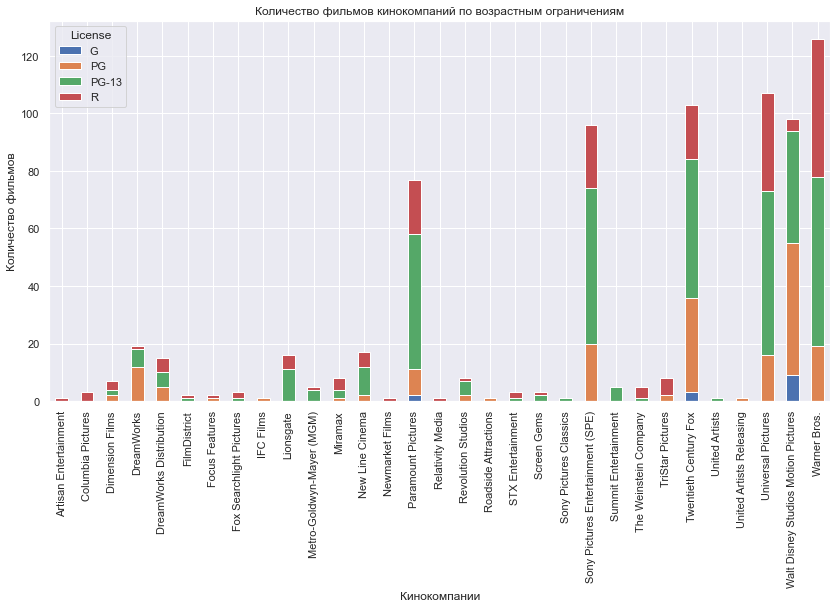

In [33]:
g = data.groupby("Distributor").License.value_counts().unstack().plot(kind="bar", stacked=True)
g.set_title("Количество фильмов кинокомпаний по возрастным ограничениям")
g.set_xlabel("Кинокомпании")
g.set_ylabel("Количество фильмов")

Text(0, 0.5, 'Количество фильмов')

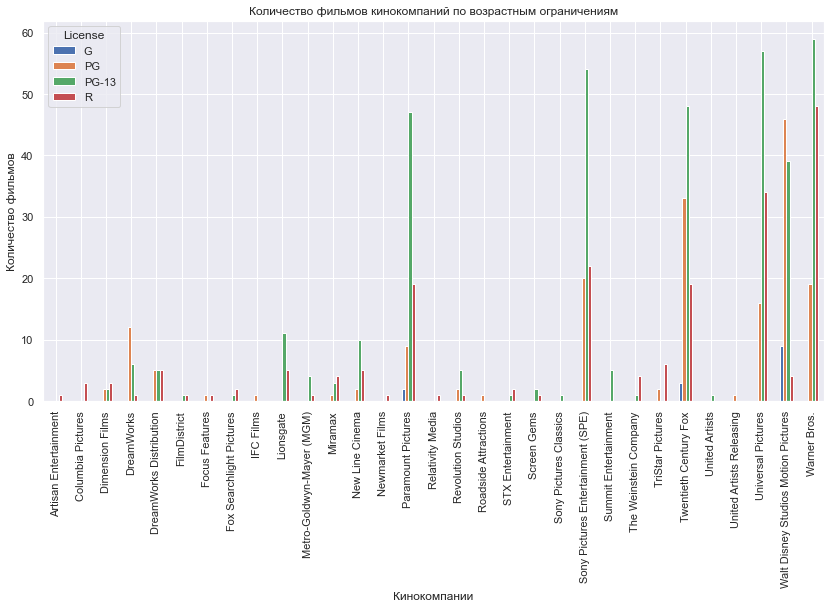

In [34]:
g = data.groupby("Distributor").License.value_counts().unstack().plot(kind="bar")
g.set_title("Количество фильмов кинокомпаний по возрастным ограничениям")
g.set_xlabel("Кинокомпании")
g.set_ylabel("Количество фильмов")

Действительно, PG-13 лидирует у многих кинокомпаний как основной возрастной рейтинг, откуда можно сделать вывод, что подростки являются целевой группой, приносящей основной доход компаниям. Эту гипотезу мы проверим чуть позднее. 

#### Гипотеза №2:

Построим круговую диаграмму по категориальной переменной Category_Duration, чтобы получить наглядную информацию.

116.0

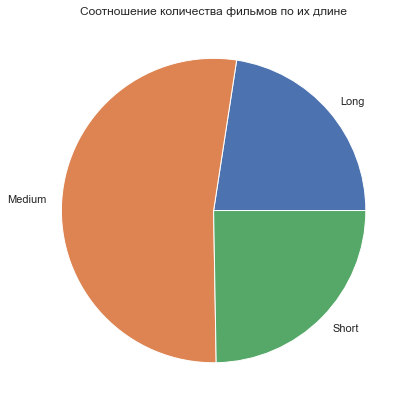

In [35]:
g = data.groupby("Category_Duration").size().plot(kind="pie")
g.set_title("Соотношение количества фильмов по их длине")
g.set_xlabel("")
g.set_ylabel("")
data.Movie_Runtime.median()

Итак, большая часть фильмов по длительности имеет среднее время (~1 час 56 минут) => параметр длительности важен при производстве фильмов.

#### Гипотеза №3:

Построим сводную таблицу по кинокомпаниям и мировым продажам (рассчитаем медиану и среднее значение).

In [82]:
data.pivot_table(index="Distributor", values="World_Sales_in_USD", aggfunc=["mean", "median", "count", "sum"]).sort_values(by=("count", "World_Sales_in_USD"), ascending=False)

,mean,median,count,sum
,World_Sales_in_USD,World_Sales_in_USD,World_Sales_in_USD,World_Sales_in_USD
Distributor,,,,
Warner Bros.,392891595.47619045,325253326.5,126,49504341030
Universal Pictures,384386394.41121495,287144079.0,107,41129344202
Twentieth Century Fox,433529812.0970874,373062864.0,103,44653570646
Walt Disney Studios Motion Pictures,598669882.1326531,456313606.5,98,58669648449
Sony Pictures Entertainment (SPE),356762657.3645833,260998864.0,96,34249215107
Paramount Pictures,359755283.54545456,294805697.0,77,27701156833
DreamWorks,521986825.1052632,554987477.0,19,9917749677
New Line Cinema,370225481.88235295,288467645.0,17,6293833192


Благодаря этой таблице мы можем увидеть топ компаний по доходу от фильмов, подметить такие интересные особенности, как например факт, что у первой компании в списке не больше всего фильмов и т.д.

In [81]:
max_sum_sales = data.groupby("Distributor", as_index=False).World_Sales_in_USD.sum().nlargest(1, columns=["World_Sales_in_USD"])
print(f"Самые высокие общие продажи:\n{max_sum_sales}")
max_dom_sales = data.groupby("Distributor", as_index=False).Domestic_Sales_in_USD.max().nlargest(1, columns=["Domestic_Sales_in_USD"])
print(f"Самые высокие внутренние продажи:\n{max_dom_sales}")
max_int_sales = data.groupby("Distributor", as_index=False).International_Sales_in_USD.max().nlargest(1, columns=["International_Sales_in_USD"])
print(f"Самые высокие внешние продажи:\n{max_int_sales}")
max_world_sales = data.groupby("Distributor", as_index=False).World_Sales_in_USD.max().nlargest(1, columns=["World_Sales_in_USD"])
print(f"Самые высокие мировые продажи:\n{max_world_sales}")

Самые высокие общие продажи:
                            Distributor  World_Sales_in_USD
29  Walt Disney Studios Motion Pictures         58669648449
Самые высокие внутренние продажи:
                            Distributor  Domestic_Sales_in_USD
29  Walt Disney Studios Motion Pictures              936662225
Самые высокие внешние продажи:
              Distributor  International_Sales_in_USD
25  Twentieth Century Fox                  2086738578
Самые высокие мировые продажи:
              Distributor  World_Sales_in_USD
25  Twentieth Century Fox          2847246203


Как видим, Walt Disney Studios Motion Pictures (4 место по количеству фильмов) лидирует и по суммарным продажам, и по мировым продажам одного фильма, в остальных категориях продаж лидирует Twentieth Century Fox (3 место по количеству фильмов), то есть гипотеза ложна, так как Warner Bros. не лидируют в этих показателях.

#### Гипотеза №4:

In [38]:
top_films = data.sort_values("World_Sales_in_USD", ascending=False)[0:100]
winter = [1, 2, 12]
summer = [6, 7, 8]
spring = [3, 4, 5]
autumn = [9, 10, 11]
top_films["Season"] = top_films.Release_Date.apply(lambda x: "Winter" if x.month in winter else "Summer" if x.month in summer else "Autumn" if x.month in autumn else "Spring")
top_films.Season.value_counts()

Spring    37
Summer    31
Autumn    19
Winter    13
Name: Season, dtype: int64

Как видим, летом выпустили больше всего фильмов среди топ-100 самых кассовых. Отсюда следует, что наиболее прибыльный сезон для кинокомпаний - лето, так как в это время наблюдается большее количество фильмов с высокими продажами. Рассмотрим отдельно фильмы на первых местах.

In [39]:
top_films[['Title', 'World_Sales_in_USD', 'Season']].head()

,Title,World_Sales_in_USD,Season
2,Avatar (2009),2847246203,Winter
1,Avengers: Endgame (2019),2797501328,Spring
3,Titanic (1997),2201647264,Winter
0,Star Wars: Episode VII - The Force Awakens (2015),2069521700,Winter
4,Jurassic World (2015),1670516444,Summer


На удивление, весной вышел только второй самый продаваемый фильм, но это можно объяснить тем, что большая часть из этих фильмов либо была ожидаема зрителями, либо вызвала большой ажиотаж после релиза.

#### Гипотеза №5:

Посчитаем корреляцию между показателями.

In [40]:
data[["World_Sales_in_USD", "Min_Age"]].corr()

,World_Sales_in_USD,Min_Age
World_Sales_in_USD,1.0,-0.1465639337238967
Min_Age,-0.1465639337238967,1.0


Как видим, корреляция не является значительной.

In [41]:
lic = ['G', 'PG', 'PG-13', 'R']
df_lic_sales = pd.DataFrame({}, index=lic)
df_lic_sales["Sales"] = [data[data['License'] == i].World_Sales_in_USD.sum() for i in lic]
df_lic_sales

,Sales
G,6400439789
PG,75279012866
PG-13,165552191557
R,54751386992


Изобразим связь между продажами и ограничениями на графиках

Text(0, 0.5, 'Возрастные ограничения')

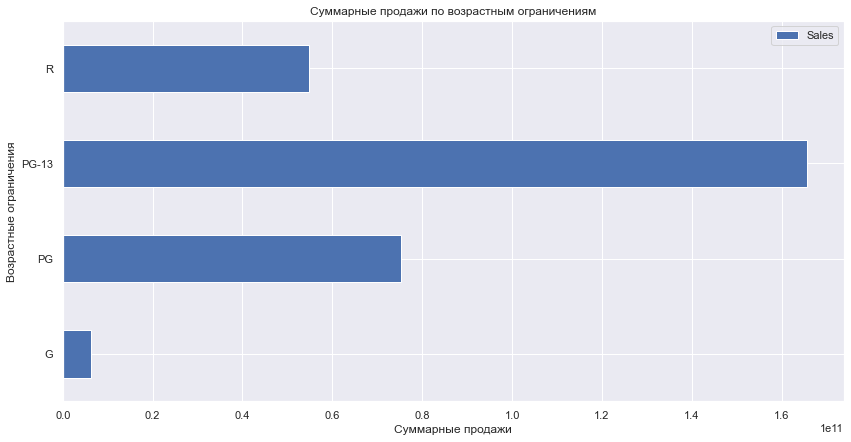

In [42]:
g = df_lic_sales.plot(kind="barh")
g.set_title("Суммарные продажи по возрастным ограничениям")
g.set_xlabel("Суммарные продажи")
g.set_ylabel("Возрастные ограничения")

Также изобразим ее через график-"коробочку", который наглядно показывает выбросы (скачки значений), а также делит все данные на квантили.

Text(0.5, 0, 'Возрастные ограничения')

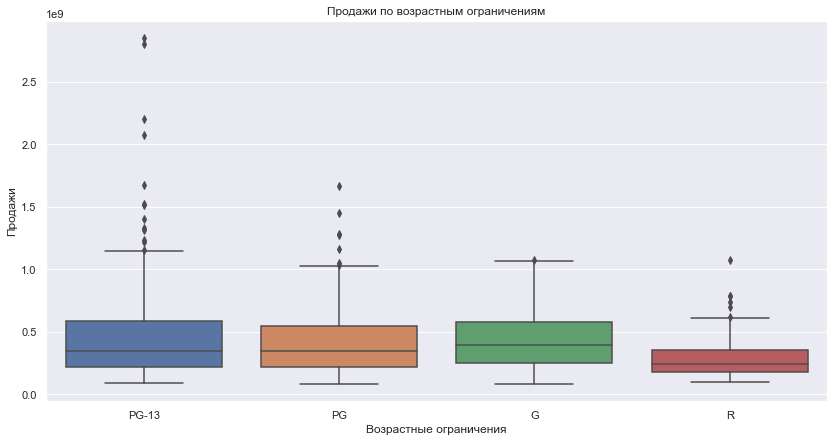

In [43]:
g = sns.boxplot(x = data.License, y = data.World_Sales_in_USD)
g.set_title("Продажи по возрастным ограничениям")
g.set_ylabel("Продажи")
g.set_xlabel("Возрастные ограничения")

Как и ожидалось, ограничение PG-13 лидирует по суммарным продажам.

#### Гипотеза №6:

Рассчитаем корреляции между жанрами и минимальным возрастом.

In [44]:
data[all_genres].corrwith(data["Min_Age"])

Action          0.14004351409212673
Adventure      -0.46534533686092394
Animation       -0.5618668153705179
Biography        0.0625799451750074
Comedy         -0.30900581659286475
Crime           0.20261752983579298
Documentary    0.058407586049090646
Drama             0.140348470179641
Family          -0.7338751526632217
Fantasy        -0.42050594699871885
History         0.08946379227853117
Horror          0.15253636867416234
Music          -0.14567995590597582
Musical         -0.2772184553995209
Mystery         0.08171739678780425
Romance       -0.007655441792945754
SciFi          -0.08070734359194062
Sport          -0.05884915678470183
Thriller         0.2865985788532244
War             0.11906801660359582
Western         0.02255679037329282
dtype: float64

Мюзиклы (корреляция ниже средней), приключенческие фильмы (средняя), фэнтези (средняя), комедии (ниже средней) и музыкальные фильмы (слабая) чаще не высокорейтинговые; как и ожидалось, семейные фильмы (выше средней) и анимации (средняя) обладают большей корреляцией с уменьшением возраста, а ужастики (слабая), триллеры (ниже средней), экшен (слабая) и криминальные фильмы (слабая) снимаются для более старших возрастов.

Создадим датафрейм, столбцы - жанры, строки - возрастной рейтинг, на пересечениях количество подходящих фильмов.

In [45]:
lic = ['G', 'PG', 'PG-13', 'R']
df_lic_genre = pd.DataFrame({}, index=lic)
df_lic_genre

""
G
PG
PG-13
R


In [46]:
for el in all_genres:
    df_lic_genre[el] = [data[data['License'] == i][data[el] == 1].shape[0] for i in lic]
df_lic_genre

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
G,0,12,10,0,12,0,0,4,13,6,0,0,4,4,1,2,2,1,0,0,0
PG,47,140,85,5,125,10,0,42,144,104,2,4,6,23,12,27,46,6,4,0,1
PG-13,226,166,3,20,110,51,0,103,6,58,8,11,8,5,29,63,122,13,114,9,6
R,70,21,1,12,64,53,2,91,0,8,11,26,4,1,29,27,19,2,74,12,2


In [47]:
df_lic_genre0 = df_lic_genre.transpose()
df_lic_genre0["All"] = df_lic_genre0['G'] + df_lic_genre0['PG'] + df_lic_genre0['PG-13'] + df_lic_genre0['R'] 
df_lic_genre0

,G,PG,PG-13,R,All
Action,0,47,226,70,343
Adventure,12,140,166,21,339
Animation,10,85,3,1,99
Biography,0,5,20,12,37
Comedy,12,125,110,64,311
Crime,0,10,51,53,114
Documentary,0,0,0,2,2
Drama,4,42,103,91,240
Family,13,144,6,0,163
Fantasy,6,104,58,8,176


По табличке видно, что возрастной порог PG(-13) популярен практически во всех жанрах (исключая не-массовые, вроде документальных фильмов или биографий).

Построим для наглядности графики.

Text(0, 0.5, 'Количество фильмов')

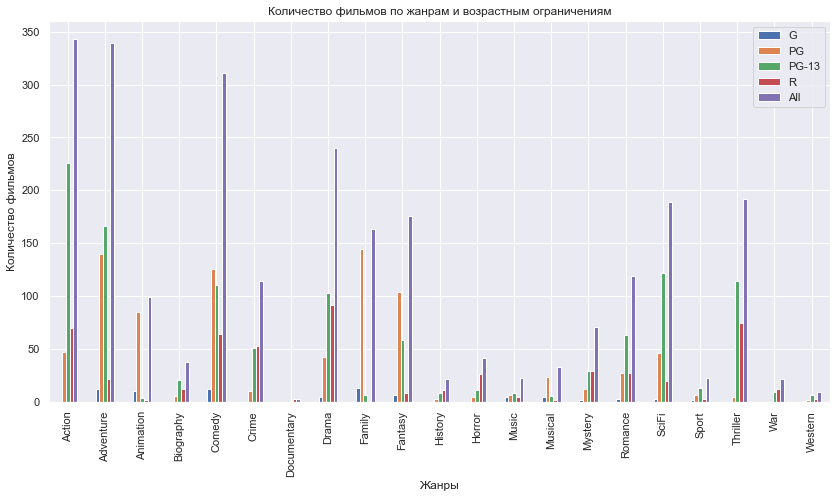

In [48]:
g = df_lic_genre0.plot(kind='bar')
g.set_title("Количество фильмов по жанрам и возрастным ограничениям")
g.set_xlabel("Жанры")
g.set_ylabel("Количество фильмов")

Уберем столбец с суммарным количеством фильмов для улучшения вида графиков.

Text(0, 0.5, 'Количество фильмов')

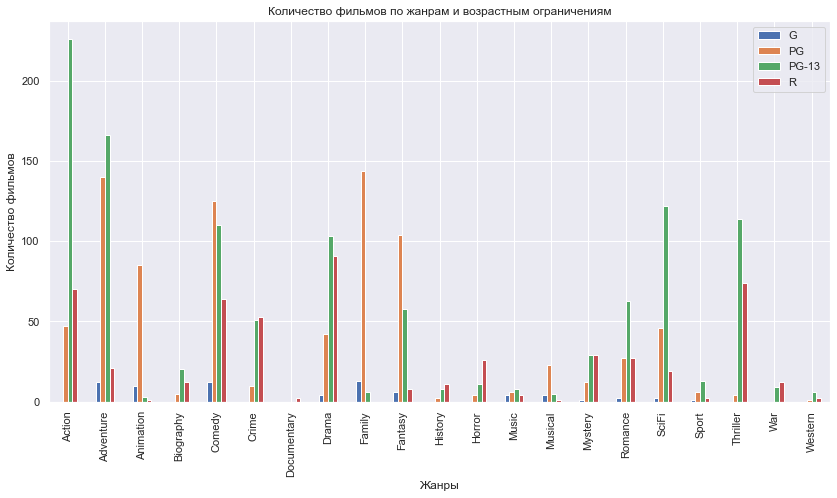

In [49]:
df_lic_genre0 = df_lic_genre.transpose()
g = df_lic_genre0.plot(kind='bar')
g.set_title("Количество фильмов по жанрам и возрастным ограничениям")
g.set_xlabel("Жанры")
g.set_ylabel("Количество фильмов")

Также построим график по не-транспонированным данным.

Text(0, 0.5, 'Количество фильмов')

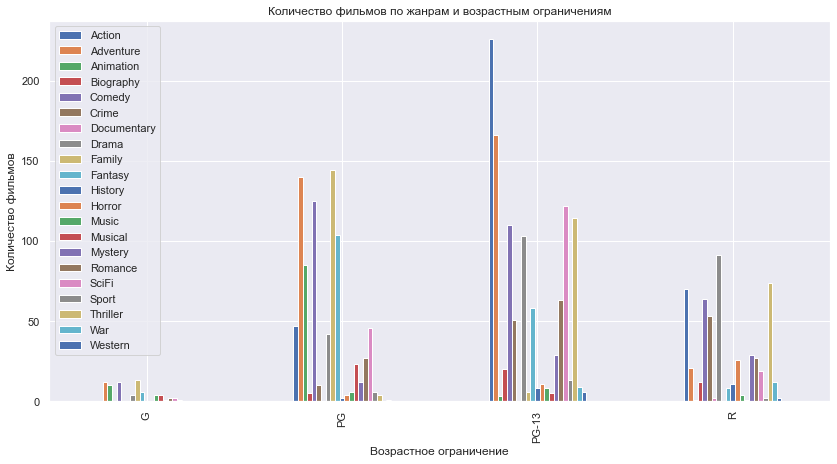

In [50]:
g = df_lic_genre.plot(kind='bar')
g.set_title("Количество фильмов по жанрам и возрастным ограничениям")
g.set_xlabel("Возрастное ограничение")
g.set_ylabel("Количество фильмов")

#### Гипотеза №7:

Покажем центральные характеристики фильмов по жанрам, так же посчитаем их корреляции с продажами.

In [51]:
data[all_genres].describe()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
count,744.0,744.0,744.0,744.0,744.0,744.0,744.0,744.0,744.0,744.0,744.0,744.0,744.0,744.0,744.0,744.0,744.0,744.0,744.0,744.0,744.0
mean,0.46102150537634407,0.45564516129032256,0.13306451612903225,0.04973118279569892,0.41801075268817206,0.1532258064516129,0.002688172043010753,0.3225806451612903,0.21908602150537634,0.23655913978494625,0.028225806451612902,0.05510752688172043,0.02956989247311828,0.04435483870967742,0.09543010752688172,0.15994623655913978,0.2540322580645161,0.02956989247311828,0.25806451612903225,0.028225806451612902,0.012096774193548387
std,0.4988136985514732,0.49836379702904837,0.339872933470863,0.21753527656423308,0.49356376452837575,0.36044734069843787,0.0518126822857555,0.4677782388072367,0.4139053059345619,0.4252551943798441,0.16572877542760217,0.2283435329531364,0.1695114600301387,0.2060207176484367,0.29400575516837785,0.36680277677760953,0.4356086739935503,0.16951146003013914,0.437864038742919,0.1657287754276022,0.10939161891282581
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [52]:
data[all_genres].corrwith(data["World_Sales_in_USD"])

Action          0.21898035267287447
Adventure        0.4192518238077261
Animation       0.11444771261223953
Biography      -0.10978763198481643
Comedy         -0.19594209042644353
Crime          -0.13458892240159645
Documentary   -0.035106432056535124
Drama          -0.11327597626420499
Family           0.0905766365315421
Fantasy         0.17984228787807577
History        -0.06518073013774572
Horror         -0.10576762693103398
Music         -0.043697074502158754
Musical         0.10004439502790441
Mystery        -0.07280855772990771
Romance        -0.08884551882129514
SciFi           0.28184798926060606
Sport          -0.11048738925569904
Thriller         -0.067093164983621
War           -0.054196033709860515
Western        -0.04482626076088681
dtype: float64

Самые выгодные жанры - приключения, фэнтези, экшены и скай-фай фильмы; меньше ходят на драмы, криминальные фильмы и комедии.

Изобразим продажи по жанрам на графиках.

In [53]:
df_gen_sales = pd.DataFrame({}, index=['All_Sales', 'Mean_Sales', 'Max_Sales', 'Min_Sales', 'Median_Sales'])
df_gen_sales

""
All_Sales
Mean_Sales
Max_Sales
Min_Sales
Median_Sales


In [54]:
for el in all_genres:
    df_gen_sales[el] = [data[data[el] == 1]['World_Sales_in_USD'].sum(),
                data[data[el] == 1]['World_Sales_in_USD'].mean(),
                data[data[el] == 1]['World_Sales_in_USD'].max(),
                data[data[el] == 1]['World_Sales_in_USD'].min(),
                data[data[el] == 1]['World_Sales_in_USD'].median()]
df_gen_sales

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
All_Sales,164300981273.0,185571646803.0,49114492835.0,9534288531.0,104026663391.0,35132739457.0,394132674.0,85247337919.0,74768346023.0,88997101050.0,6043401453.0,11096163934.0,7228854515.0,18126934867.0,23903226636.0,40818363472.0,104903804886.0,4629282064.0,71185716929.0,6461400558.0,2527104686.0
Mean_Sales,479011607.20991254,547408987.619469,496105988.2323232,257683473.8108108,334490879.07073957,308181925.0614035,197066337.0,355197241.32916665,458701509.3435583,505665346.875,287781021.5714286,270638144.73170733,328584296.1363636,549301056.5757576,336665163.8873239,343011457.7478992,555046586.6984127,210421912.0,370758942.3385417,307685740.85714287,280789409.5555556
Max_Sales,2847246203.0,2847246203.0,1662899439.0,910809311.0,1450026933.0,1236005118.0,222446882.0,2797501328.0,1662899439.0,2847246203.0,532950503.0,701796444.0,910809311.0,1662899439.0,1025468216.0,2201647264.0,2847246203.0,559852396.0,1515341399.0,822824522.0,532950503.0
Min_Sales,101624843.0,82604699.0,140705322.0,86086881.0,90709367.0,101624843.0,171685792.0,86086881.0,86086881.0,97918663.0,132820716.0,106285522.0,86086881.0,136853506.0,82604699.0,96070507.0,82604699.0,97470701.0,128799509.0,132820716.0,162360636.0
Median_Sales,375540831.0,457696391.0,430051293.0,224920375.0,269994119.0,236776480.0,197066337.0,269871214.5,359126022.0,400021329.5,269784201.0,223664608.0,304448367.5,436949634.0,275650703.0,262511490.0,433514834.0,179779613.5,311950818.5,215294342.0,250288523.0


In [55]:
df_gen_sales0 = df_gen_sales.transpose()
df_gen_sales0

,All_Sales,Mean_Sales,Max_Sales,Min_Sales,Median_Sales
Action,164300981273.0,479011607.20991254,2847246203.0,101624843.0,375540831.0
Adventure,185571646803.0,547408987.619469,2847246203.0,82604699.0,457696391.0
Animation,49114492835.0,496105988.2323232,1662899439.0,140705322.0,430051293.0
Biography,9534288531.0,257683473.8108108,910809311.0,86086881.0,224920375.0
Comedy,104026663391.0,334490879.07073957,1450026933.0,90709367.0,269994119.0
Crime,35132739457.0,308181925.0614035,1236005118.0,101624843.0,236776480.0
Documentary,394132674.0,197066337.0,222446882.0,171685792.0,197066337.0
Drama,85247337919.0,355197241.32916665,2797501328.0,86086881.0,269871214.5
Family,74768346023.0,458701509.3435583,1662899439.0,86086881.0,359126022.0
Fantasy,88997101050.0,505665346.875,2847246203.0,97918663.0,400021329.5


Text(0, 0.5, 'Продажи')

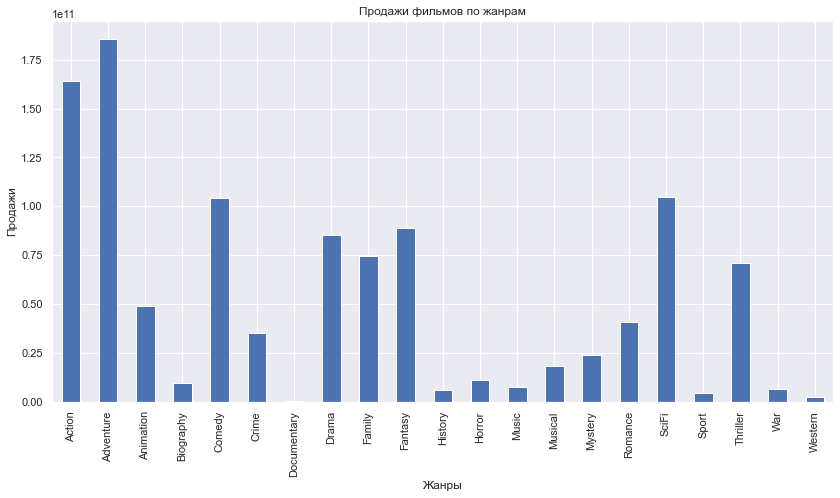

In [56]:
g = df_gen_sales0['All_Sales'].plot(kind='bar')
g.set_title("Продажи фильмов по жанрам")
g.set_xlabel("Жанры")
g.set_ylabel("Продажи")

Наложим графики с различными характеристиками для наглядности разницы показателей.

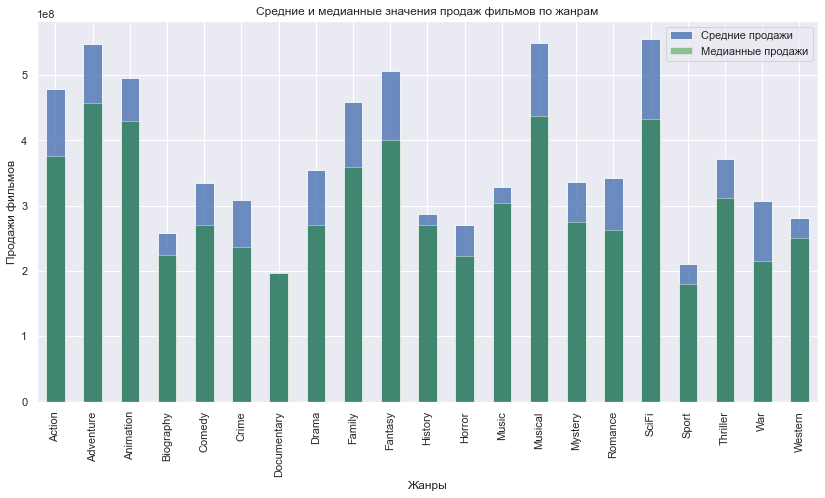

In [57]:
df_gen_sales0['Mean_Sales'].plot(kind='bar', alpha=0.8)
g = df_gen_sales0['Median_Sales'].plot(kind='bar', alpha=0.4, color='green')
g.set_title("Средние и медианные значения продаж фильмов по жанрам")
g.set_xlabel("Жанры")
g.set_ylabel("Продажи фильмов")
g.legend(["Средние продажи", "Медианные продажи"])

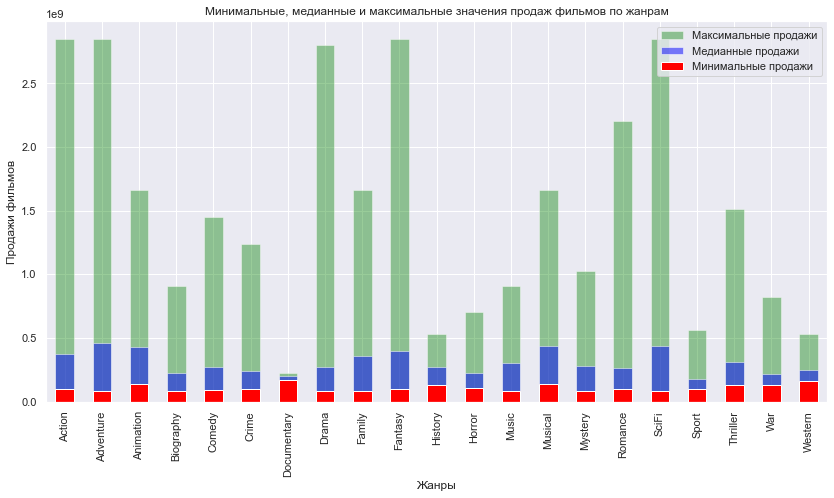

In [58]:
df_gen_sales0['Max_Sales'].plot(kind='bar', alpha=0.4, color='green')
df_gen_sales0['Median_Sales'].plot(kind='bar', alpha=0.5, color='blue')
g = df_gen_sales0['Min_Sales'].plot(kind='bar', alpha=1, color='red')
g.set_title("Минимальные, медианные и максимальные значения продаж фильмов по жанрам")
g.set_xlabel("Жанры")
g.set_ylabel("Продажи фильмов")
g.legend(["Максимальные продажи", "Медианные продажи", "Минимальные продажи"])

#### Гипотеза №8:

In [59]:
data[['Domestic_Sales_in_USD', 'International_Sales_in_USD', 'World_Sales_in_USD']].corrwith(data["Release_Date"].apply(lambda x: x.year))

Domestic_Sales_in_USD        0.09351480017282245
International_Sales_in_USD    0.2289450193837815
World_Sales_in_USD            0.1929886377806207
dtype: float64

Слабая корреляция продаж и новизны фильма (причем больше выросли сборы международных фильмов, что демонстрирует глобализацию киноиндустрии).

Проанализируем продажи по декадам.

Text(0, 0.5, 'Количество фильмов')

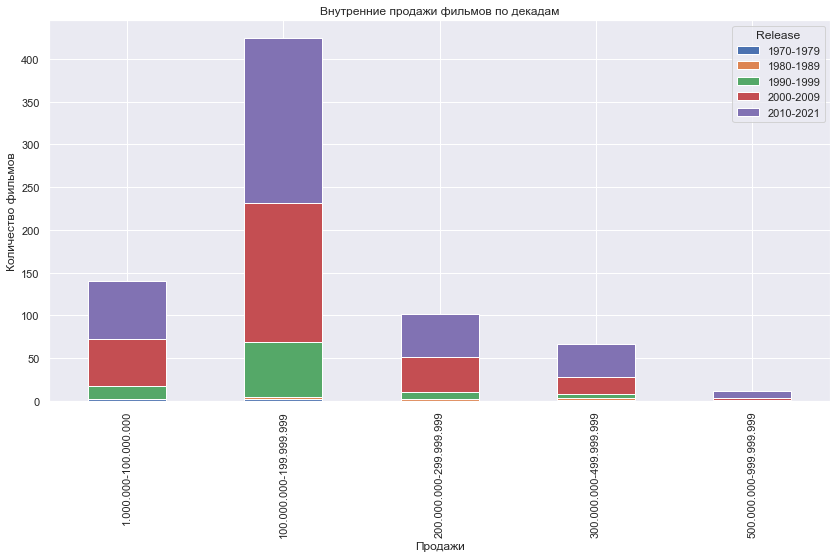

In [60]:
def r(x):
  if x.Release_Date >= pd.to_datetime('01/01/2010'): return '2010-2021'
  elif x.Release_Date >= pd.to_datetime('01/01/2000'): return '2000-2009'
  elif x.Release_Date >= pd.to_datetime('01/01/1990'): return '1990-1999'
  elif x.Release_Date >= pd.to_datetime('01/01/1980'): return '1980-1989'
  elif x.Release_Date >= pd.to_datetime('01/01/1970'): return '1970-1979'
  else: return 'before 1970'

def w(x):
  if x >= 10000000000: return '>1.000.000.000'
  elif x >= 500000000: return '500.000.000-999.999.999'
  elif x >= 300000000: return '300.000.000-499.999.999'
  elif x >= 200000000: return '200.000.000-299.999.999'
  elif x >= 100000000: return '100.000.000-199.999.999'
  elif x >= 1000000: return '1.000.000-100.000.000'
  elif x >= 500000: return '500.000-999.999'
  elif x >= 100000: return '100.000-499.999'
  elif x >= 1000: return '1.000-99.999'
  else: return 'less then 1000$'
    
data_grp = data[['Distributor','Release_Date', 'Domestic_Sales_in_USD', 'International_Sales_in_USD', 'World_Sales_in_USD']]
data_grp['Release'] = data_grp.apply(r, axis=1)
data_grp['Domestic_Sales'] = data_grp.Domestic_Sales_in_USD.apply(w)
data_grp['International_Sales'] = data_grp.International_Sales_in_USD.apply(w)
data_grp['World_Sales'] = data_grp.World_Sales_in_USD.apply(w)

g = data_grp.groupby("Domestic_Sales").Release.value_counts().unstack().plot(kind="bar", stacked=True)
g.set_title("Внутренние продажи фильмов по декадам")
g.set_xlabel("Продажи")
g.set_ylabel("Количество фильмов")

Text(0, 0.5, 'Количество фильмов')

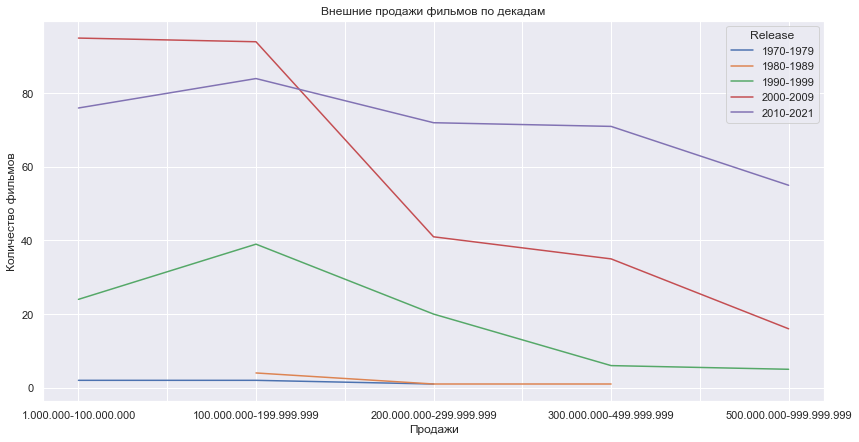

In [61]:
g = data_grp.groupby("International_Sales").Release.value_counts().unstack().plot(kind="line")
g.set_title("Внешние продажи фильмов по декадам")
g.set_xlabel("Продажи")
g.set_ylabel("Количество фильмов")

Text(0, 0.5, 'Количество фильмов')

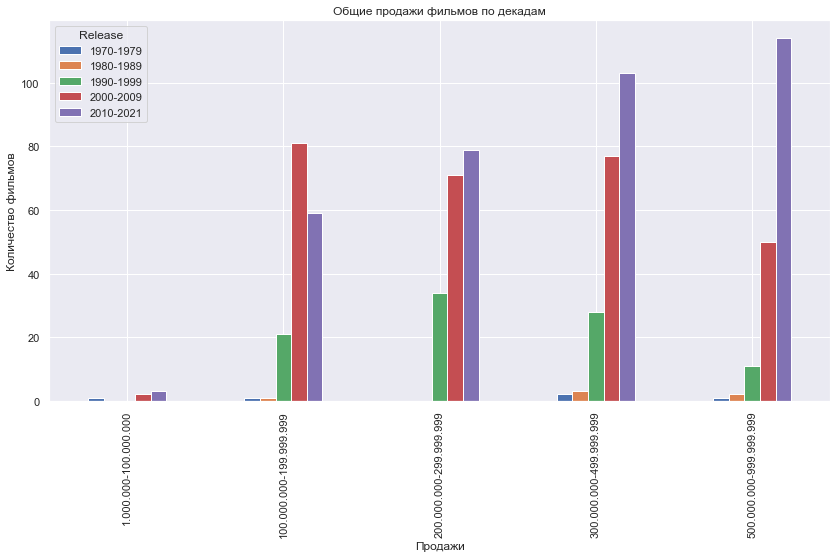

In [62]:
g = data_grp.groupby("World_Sales").Release.value_counts().unstack().plot(kind="bar")
g.set_title("Общие продажи фильмов по декадам")
g.set_xlabel("Продажи")
g.set_ylabel("Количество фильмов")

Фильмы, выпущенные позже, получают больше сборов, при этом и их количество превышает количество фильмов, вышедших ранее. К причинам этого относится и то, что сейчас киноиндустрия в целом более развита, ранее съемка была дорогим и сложным процессом, не было большого выбора оборудования для съемки и тд. + тот же самый фактор глобализации.

#### Гипотеза №9:

Посчитаем корреляцию и изобразим взаимосвязь на графике рассеяния.

In [63]:
data[["Domestic_Sales_in_USD", "International_Sales_in_USD"]].corr()

,Domestic_Sales_in_USD,International_Sales_in_USD
Domestic_Sales_in_USD,1.0,0.7959711095302299
International_Sales_in_USD,0.7959711095302299,1.0


Text(0.5, 1.0, 'График зависимости внешних и внутренних продаж фильмов')

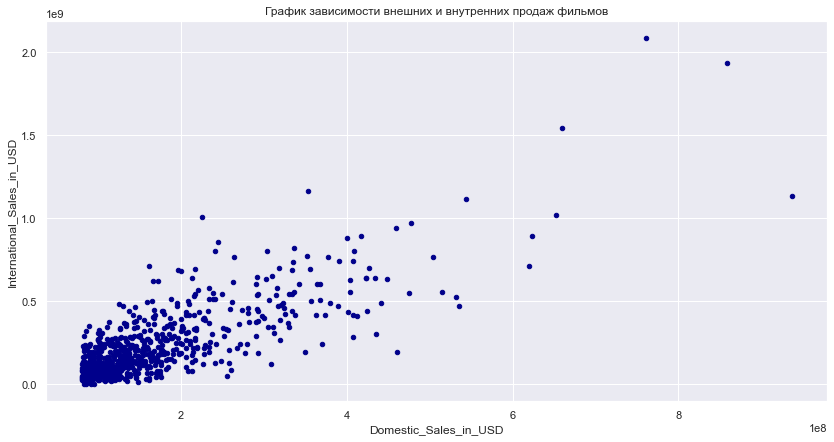

In [64]:
g = data.plot.scatter(x='Domestic_Sales_in_USD', y='International_Sales_in_USD', c='DarkBlue')
g.set_title("График зависимости внешних и внутренних продаж фильмов")

Корреляция выше средней, рассеяние наглядно показано на графике (можно заметить, особенно в нижнем правом углу, что точки складываются в этакую широкую полосу, направляющуюся в противоположный угол).

#### Гипотеза №10:

In [65]:
dist = data.Distributor.unique()
df_dist_genres = pd.DataFrame({}, index=dist)
for el in all_genres:
    df_dist_genres[el] = [data[data.Distributor == i][data[el] == 1].shape[0] for i in dist]
df_dist_genres

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
Walt Disney Studios Motion Pictures,41,75,26,3,46,4,0,29,50,46,2,0,3,12,7,16,33,5,11,2,1
Twentieth Century Fox,55,61,22,5,43,13,0,26,29,26,3,1,7,7,7,9,39,3,29,1,1
Paramount Pictures,41,38,5,3,22,9,1,19,6,12,0,6,2,2,10,9,24,2,24,1,2
Universal Pictures,41,30,11,10,50,19,0,30,16,15,5,5,5,6,6,22,19,2,30,4,1
Warner Bros.,67,49,5,5,38,25,0,45,19,29,3,9,2,2,18,15,36,4,33,3,1
DreamWorks Distribution,2,6,5,1,5,3,0,8,5,5,0,3,0,1,3,2,0,0,5,1,0
Lionsgate,10,10,0,0,2,3,1,5,0,2,0,1,1,1,4,2,7,0,10,1,0
Sony Pictures Entertainment (SPE),46,36,12,5,56,21,0,31,17,18,3,4,0,1,6,16,19,4,24,3,2
DreamWorks,11,14,12,0,15,1,0,2,12,8,0,0,0,0,2,3,5,1,2,1,0
New Line Cinema,11,6,0,0,9,8,0,5,1,5,0,3,0,0,1,4,1,0,5,0,0


Text(0, 0.5, 'Количество фильмов')

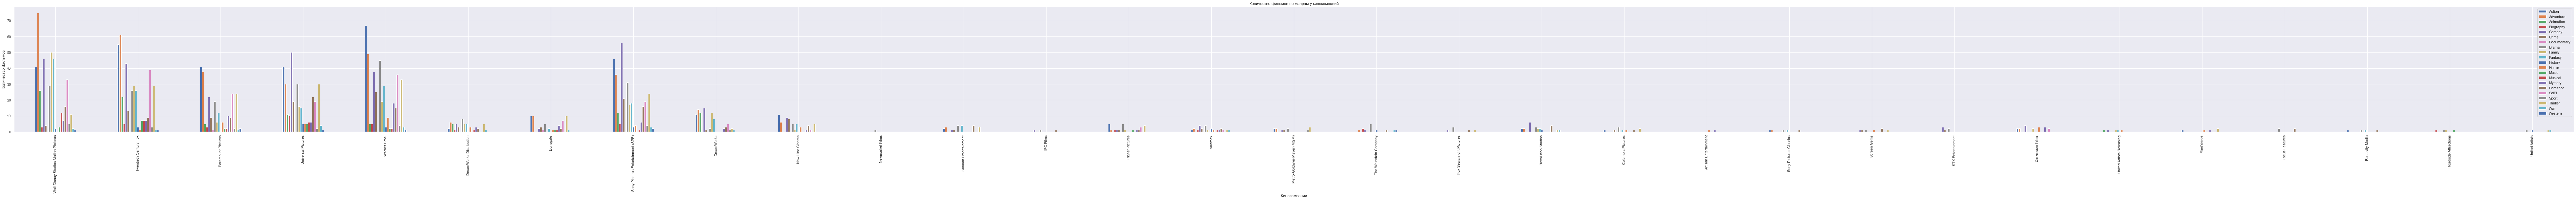

In [66]:
g = df_dist_genres.plot(kind='bar', figsize=(140, 7))
g.set_title("Количество фильмов по жанрам у кинокомпаний")
g.set_xlabel("Кинокомпании")
g.set_ylabel("Количество фильмов")

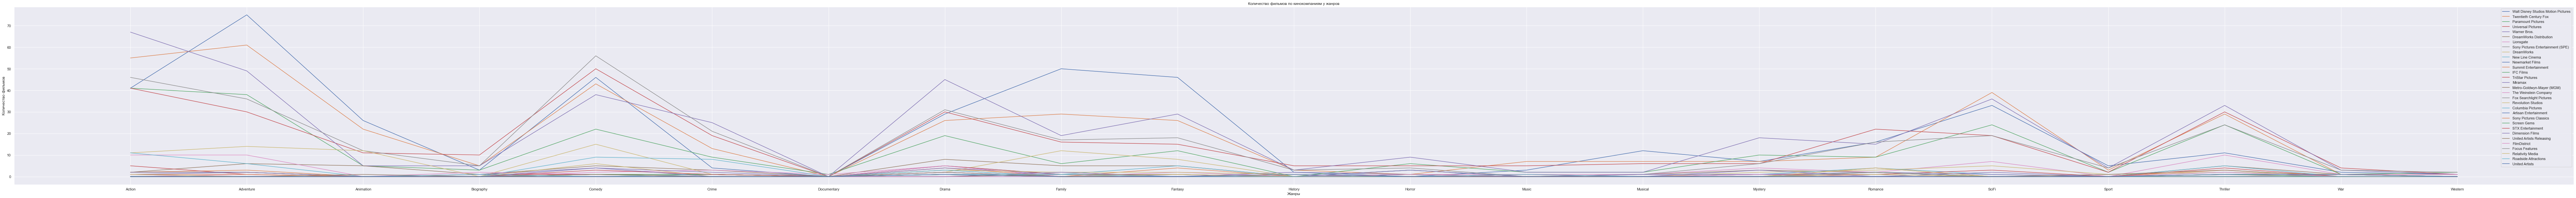

In [67]:
g = df_dist_genres.transpose().plot(kind='line', figsize=(140, 10))
g.set_title("Количество фильмов по кинокомпаниям у жанров")
g.set_xlabel("Жанры")
g.set_ylabel("Количество фильмов")
plt.xticks(ticks=range(len(all_genres)), labels=all_genres)
plt.show()

Мы ошиблись - Дисней снимает приключенческие фильмы, а анимации лишь на 7 месте:( Однако, нет кинокомпаний, которые снимают большее количество анимаций, чем Дисней:D

### Завершение исследования

Мы проверили наши гипотезы, увидели, что некоторые из них оказались верными, а некоторые, неожиданно для нас, были ошибочными. Во время исследования мы применили знания, которые получили на НИСе, на практике, что помогло нам лучше усвоить их. Перед завершением 1 части нашего исследовательского проекта построим еще несколько графиков и статистик для общего анализа.

In [68]:
data

,Title,Distributor,Release_Date,Domestic_Sales_in_USD,International_Sales_in_USD,World_Sales_in_USD,Movie_Runtime,License,Min_Age,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western,Category_Sum_Sales,Category_Duration
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,138,PG-13,13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,High,Long
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,181,PG-13,13,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,High,Long
2,Avatar (2009),Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,162,PG-13,13,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,High,Long
3,Titanic (1997),Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,194,PG-13,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,High,Long
4,Jurassic World (2015),Universal Pictures,2015-06-10,652385625,1018130819,1670516444,124,PG-13,13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,While You Were Sleeping (1995),Walt Disney Studios Motion Pictures,1995-04-21,81057016,101000000,182057016,103,PG,9,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,Low,Medium
740,The Notebook (2004),New Line Cinema,2004-06-25,81001787,36813370,117815157,123,PG-13,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,Low,Medium
741,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),2010-08-13,80574010,124020006,204594016,133,PG-13,13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,Low,Long
742,The Texas Chainsaw Massacre (2003),New Line Cinema,2003-10-17,80571655,26792250,107363905,98,R,16,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Low,Short


Доли возрастных лицензий относительно всех фильмов.

In [69]:
data.License.value_counts(normalize=True)

PG-13    0.4879032258064516
R         0.260752688172043
PG       0.2325268817204301
G       0.01881720430107527
Name: License, dtype: float64

Самый распространенный дистрибьютор (через моду).

In [70]:
data.Distributor.mode()

0    Warner Bros.
dtype: object

И возрастное ограничение через моду.

In [71]:
data.License.mode()

0    PG-13
dtype: object

Самая распространенная категория по продажам через моду.

In [72]:
data.Category_Sum_Sales.mode()

0    High
dtype: object

Здесь мы удивились и проверили по графику, оказалось, что распределение довольно равномерное

Text(0.5, 1.0, 'Количество фильмов по уровню продаж')

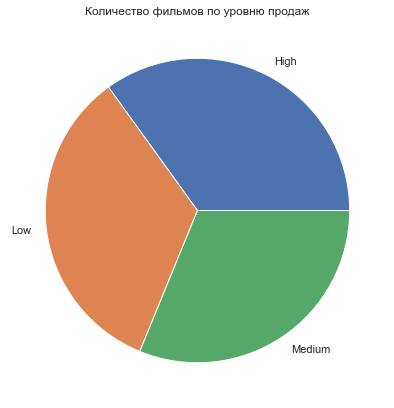

In [73]:
g = data.groupby('Category_Sum_Sales').size().plot(kind='pie')
g.set_ylabel("")
g.set_title("Количество фильмов по уровню продаж")

Посчитали среднеквадратические отклонения для переменных. Как видим, для даты релиза это примерно 7-8 лет, для длительности вильма - 20 минут, для продаж отклонение измеряется в сотнях миллионов долларов.

In [74]:
data.std()

Release_Date                  2844 days 20:34:35.507448928
Domestic_Sales_in_USD                    103639995.3534207
International_Sales_in_USD              219630423.27231184
World_Sales_in_USD                      309029939.92571735
Movie_Runtime                            20.87932380107638
Min_Age                                  3.017534635291675
Action                                  0.4988136985514732
Adventure                              0.49836379702904837
Animation                                0.339872933470863
Biography                              0.21753527656423308
Comedy                                 0.49356376452837575
Crime                                  0.36044734069843787
Documentary                             0.0518126822857555
Drama                                   0.4677782388072367
Family                                  0.4139053059345619
Fantasy                                0.42525519437984416
History                                0.165728775427602

Ради интереса решили посчитать, какая продолжительность самая популярная. Интересно, что топ-5 довольно близок к медиане по переменной.

In [75]:
data.Movie_Runtime.value_counts()

115    21
106    19
95     18
116    18
130    17
       ..
166     1
163     1
156     1
155     1
201     1
Name: Movie_Runtime, Length: 97, dtype: int64

Количество фильмов по каждому возрастному ограничению у различных кинокомпаний.

In [76]:
data.groupby('License').Distributor.value_counts()

License  Distributor                        
G        Walt Disney Studios Motion Pictures     9
         Twentieth Century Fox                   3
         Paramount Pictures                      2
PG       Walt Disney Studios Motion Pictures    46
         Twentieth Century Fox                  33
                                                ..
R        Metro-Goldwyn-Mayer (MGM)               1
         Newmarket Films                         1
         Relativity Media                        1
         Revolution Studios                      1
         Screen Gems                             1
Name: Distributor, Length: 67, dtype: int64

Наконец, графики распределения продаж фильмов.

Text(0.5, 1.0, 'График распределения мировых продаж фильмов')

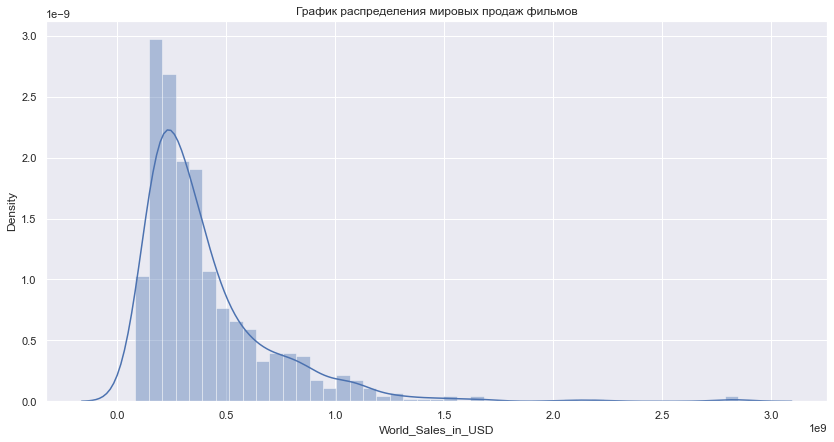

In [77]:
g = sns.distplot(data.World_Sales_in_USD.dropna())
g.set_title("График распределения мировых продаж фильмов")

Text(0.5, 1.0, 'График распределения мировых продаж фильмов (в сравнении с нормальным распределением)')

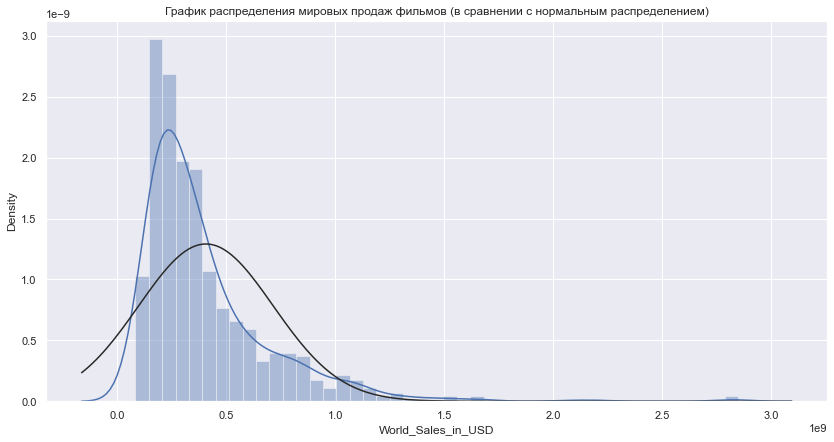

In [78]:
g = sns.distplot(data.World_Sales_in_USD.dropna(), fit=norm)
g.set_title("График распределения мировых продаж фильмов (в сравнении с нормальным распределением)")

На построенных графиках мы можем увидеть, что идет смещение продаж в меньшую сторону, но при этом есть аномальные выбросы в правой части - это отклонение от предлагаемой нормы, но на деле довольно естественно, что в лидеры выбивается малое количество фильмов. Попробуем избавиться от скачков и рассмотреть продажи еще раз.

Text(0.5, 1.0, 'График распределения мировых продаж фильмов без скачков (в сравнении с нормальным распределением)')

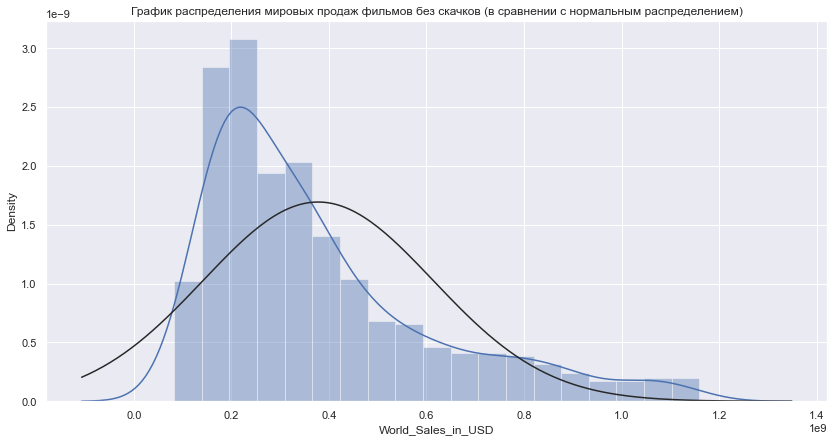

In [79]:
df = data[data.World_Sales_in_USD < 1200000000]
g = sns.distplot(df.World_Sales_in_USD.dropna(), fit=norm)
g.set_title("График распределения мировых продаж фильмов без скачков (в сравнении с нормальным распределением)")

Как легко заметить, чем меньше мы устанавливаем верхнюю планку, тем ближе график к нормальному.

### Подготовили Мамедли Мария, Морин Илья, Ягло Никита.